# Visual Analysis of Movies Data

## Objectives

1. How complete is the data? (How many null values in each column) Are the data types of each column correct?
2. How much do movies typically make at the box office? - piechart
3. Which genre performs better on average in terms of Rotten Tomatoes score? - barplot
4. Can romance movies perform well if it is not released around the Valentine month(February)? - barplot
5. How much of a difference is there between the Rotten Tomatoes Score and the Audience Score? - hexplot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
# Try to read the CSV file
pd.set_option('display.max_columns', None)
try:
    # Read the CSV file with hash as a separator
    movies_data = pd.read_csv("rotten_tomatoes_movies.csv", sep='#')
    
    # Print the first 5 rows of the DataFrame
    print("Here are the first 5 rows of the DataFrame:")
    print(movies_data.head())

# Handle any exception that might occur
except:
    print("An error occurred while trying to read the file. Please check the file path and format.")

An error occurred while trying to read the file. Please check the file path and format.


In [3]:
# Load the data properly
pd.set_option('display.max_columns', None)
try:
    # Read the CSV file with comma as a separator
    movies_data = pd.read_csv("rotten_tomatoes_movies.csv", sep=',')
    
    # Print the first 5 rows of the DataFrame
    print("Here are the first 5 rows of the DataFrame:")
    print(movies_data.head())

# Handle any exception that might occur
except:
    print("An error occurred while trying to read the file. Please check the file path and format.")

Here are the first 5 rows of the DataFrame:
                     id                title  audienceScore  tomatoMeter  \
0    space-zombie-bingo  Space Zombie Bingo!           50.0          NaN   
1       the_green_grass      The Green Grass            NaN          NaN   
2             love_lies           Love, Lies           43.0          NaN   
3  the_sore_losers_1997          Sore Losers           60.0          NaN   
4  dinosaur_island_2002      Dinosaur Island           70.0          NaN   

  rating ratingContents releaseDateTheaters releaseDateStreaming  \
0    NaN            NaN                 NaN           2018-08-25   
1    NaN            NaN                 NaN           2020-02-11   
2    NaN            NaN                 NaN                  NaN   
3    NaN            NaN                 NaN           2020-10-23   
4    NaN            NaN                 NaN           2017-03-27   

   runtimeMinutes                          genre originalLanguage  \
0            75.0    

In [4]:
#Get more info on what the data is like
print(f"This dataset has {movies_data.shape[0]} rows and {movies_data.shape[1]} columns")
print(movies_data.columns)

This dataset has 143258 rows and 16 columns
Index(['id', 'title', 'audienceScore', 'tomatoMeter', 'rating',
       'ratingContents', 'releaseDateTheaters', 'releaseDateStreaming',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director', 'writer',
       'boxOffice', 'distributor', 'soundMix'],
      dtype='object')


### Objective 1: How complete is the data? Are the data types for each column correct?

In [5]:
#Check for null values to see how complete the data is
print(movies_data.isnull().sum())

#Check data types of each column
print(movies_data.dtypes)

id                           0
title                      367
audienceScore            70010
tomatoMeter             109381
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                  4217
writer                   53142
boxOffice               128515
distributor             120257
soundMix                127341
dtype: int64
id                       object
title                    object
audienceScore           float64
tomatoMeter             float64
rating                   object
ratingContents           object
releaseDateTheaters      object
releaseDateStreaming     object
runtimeMinutes          float64
genre                    object
originalLanguage         object
director                 object
writer                   object
boxOffice                object
distributor              object
soundMix   

#### IMPORTANT NOTE:
Considering the questions we want to answer, we are only working with rows where the "title", "audienceScore", "tomatoMeter", "releaseDateTheaters", "runtimeMinutes", "genre", and "boxOffice" columns are not null.

In [6]:
#Make a series that shows the rows with not null values
not_null_mask = movies_data[["title", "audienceScore", "tomatoMeter", "releaseDateTheaters", "runtimeMinutes", "genre",
                             "boxOffice"]].notnull().all(axis=1)

#Make a new dataframe that only uses rows with not null values
movies_data_no_null = movies_data[not_null_mask].copy()

#Remove unwanted columns. "releaseDateStreaming" column is kept just in case
movies_data_no_null = movies_data_no_null[["title", "audienceScore", "tomatoMeter", "releaseDateTheaters", "releaseDateStreaming",
                                           "runtimeMinutes", "genre", "boxOffice"]]

#Check for null values
print(movies_data_no_null.isnull().sum())

title                     0
audienceScore             0
tomatoMeter               0
releaseDateTheaters       0
releaseDateStreaming    454
runtimeMinutes            0
genre                     0
boxOffice                 0
dtype: int64


In [7]:
#How many rows are we working with?
print(f"There are {len(movies_data_no_null)} rows in the movies_data_no_null dataframe")

There are 11003 rows in the movies_data_no_null dataframe


In [8]:
#Peek at the new dataframe
print(movies_data_no_null.head())

                       title  audienceScore  tomatoMeter releaseDateTheaters  \
5                     Adrift           65.0         69.0          2018-06-01   
17                       Paa           67.0         50.0          2009-12-04   
20  Sarah Palin: You Betcha!           61.0         32.0          2011-09-30   
31           A State of Mind           92.0         89.0          2005-08-10   
63              Race the Sun           41.0         22.0          1996-03-22   

   releaseDateStreaming  runtimeMinutes                      genre boxOffice  
5            2018-08-21           120.0  Adventure, Drama, Romance    $31.4M  
17                  NaN           133.0                      Drama   $199.2K  
20           2017-03-08            90.0                Documentary    $10.5K  
31           2007-06-11            93.0                Documentary    $41.5K  
63           2002-04-30            99.0                      Drama     $1.7M  


In [9]:
# Correct data types for title, releaseDateTheaters, genre, and boxOffice
movies_data_no_null["title"] = movies_data_no_null["title"].astype("string")
movies_data_no_null["genre"] = movies_data_no_null["genre"].astype("string")
movies_data_no_null['releaseDateTheaters'] = pd.to_datetime(movies_data_no_null['releaseDateTheaters'], format='%Y-%m-%d', errors='coerce')

# Change the string values of "genre" to lower case
movies_data_no_null["genre"] = movies_data_no_null["genre"].str.lower()

# Standardise the "genre" column by changing formats from this: "action, mystery & thriller" to this: "action, mystery, thriller".
movies_data_no_null["genre"] = movies_data_no_null["genre"].apply(lambda string : string.replace(" & ", ", ")
                                                                  if " & " in string else string)

#Merge redundant genres
def merge_genres(string):
    if "gay" in string and "lesbian" in string:
        string = string.replace("lesbian", "lgbtq+")
        string = string.replace("gay", "lgbtq+")
        return string
    elif "gay" in string:
        string = string.replace("gay", "lgbtq+")
        return string
    elif "lesbian" in string:
        string = string.replace("lesbian", "lgbtq+")
        return string
    elif "anime" in string:
        string = string.replace("anime", "animation")
        return string
    else:
        return string

movies_data_no_null["genre"] = movies_data_no_null["genre"].apply(merge_genres)

#Merge music genre into musical
movies_data_no_null['genre'] = movies_data_no_null['genre'].str.replace(r'\bmusic\b', 'musical', regex=True)

# Correct data types for "genre". Don't know this has to be done again
movies_data_no_null["genre"] = movies_data_no_null["genre"].astype("string")

#All the lines below this comment are for converting string values in boxOffice to float
movies_data_no_null["boxOffice"] = movies_data_no_null["boxOffice"].astype("string")

# convert string values in "boxOffice" column to float values in terms of millions(M)
def str_to_float(string):
    if 'M' in string:
        return float(string[1:-1])
    elif 'K' in string:
        return float(string[1:-1]) / 1000
    else:
        #For boxOffice values that are <=$999
        return float(string[1:]) / 1000000

movies_data_no_null["boxOffice"] = movies_data_no_null["boxOffice"].apply(str_to_float)

#After the appropriate values are in the boxOffice column, convert the data type of that column
movies_data_no_null["boxOffice"] = movies_data_no_null["boxOffice"].astype("float64")

#Check the finalised dataframe
print(movies_data_no_null.head())
print(movies_data_no_null.dtypes)
print(movies_data_no_null.isnull().sum())

                       title  audienceScore  tomatoMeter releaseDateTheaters  \
5                     Adrift           65.0         69.0          2018-06-01   
17                       Paa           67.0         50.0          2009-12-04   
20  Sarah Palin: You Betcha!           61.0         32.0          2011-09-30   
31           A State of Mind           92.0         89.0          2005-08-10   
63              Race the Sun           41.0         22.0          1996-03-22   

   releaseDateStreaming  runtimeMinutes                      genre  boxOffice  
5            2018-08-21           120.0  adventure, drama, romance    31.4000  
17                  NaN           133.0                      drama     0.1992  
20           2017-03-08            90.0                documentary     0.0105  
31           2007-06-11            93.0                documentary     0.0415  
63           2002-04-30            99.0                      drama     1.7000  
title                   string[python]


In [10]:
#Make a list of movie titles with "robot" in it
robot_in_title = [title for title in movies_data_no_null["title"] if "robot" in title.lower()]

print(robot_in_title)

['Robot Stories', 'Robot Jox', 'Robot & Frank', 'I, Robot']


### Objective 2: How much do movies typically earn at the box office?

In [11]:
#Basic statistical data of box office earnings from movies
print(movies_data_no_null["boxOffice"].describe())

count    11003.000000
mean        23.234757
std         54.433978
min          0.000000
25%          0.094500
50%          1.600000
75%         22.200000
max        858.400000
Name: boxOffice, dtype: float64


boxOffice_category
<2M$            5706
2M\$-10M\$      1480
10M\$-50M\$     2297
50M\$-100M\$     826
>100M$           694
Name: count, dtype: int64


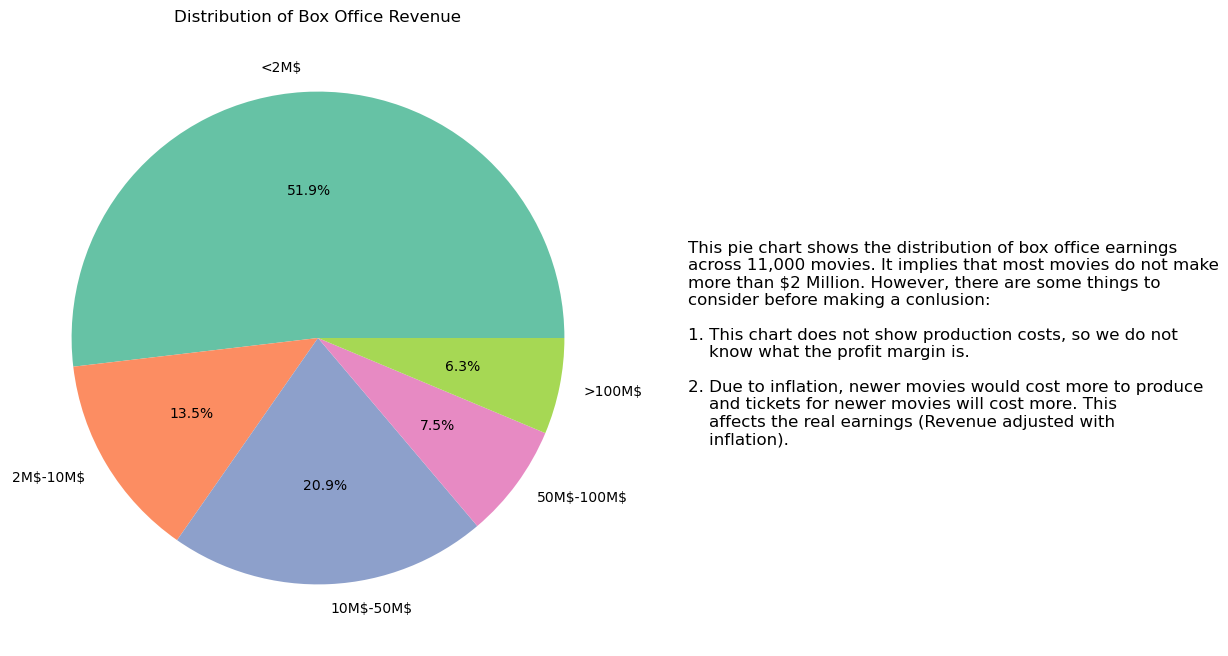

In [12]:
# Define the categories
bins_boxOffice = [0, 2, 10, 50, 100, 900]
labels_boxOffice = ['<2M$', '2M\\$-10M\\$', '10M\\$-50M\\$', "50M\\$-100M\\$", ">100M$"]

# Bin the data to categorise Box Office earnings
movies_data_no_null["boxOffice_category"] = pd.cut(movies_data_no_null["boxOffice"], bins=bins_boxOffice, labels=labels_boxOffice,
                                                   include_lowest=True)

# Count the number of movies in each category
category_counts = movies_data_no_null["boxOffice_category"].value_counts(sort=False)
print(category_counts)

# Plot the pie chart
fig = plt.figure(figsize=(16, 8))
ax = plt.pie(category_counts, labels=labels_boxOffice, autopct="%1.1f%%", colors=sns.color_palette("Set2", len(labels_boxOffice)))
plt.title('Distribution of Box Office Revenue')

# Supporting text to better understand the pie chart
plt.text(1.5, -0.5, 
         "This pie chart shows the distribution of box office earnings\n"
         "across 11,000 movies. It implies that most movies do not make\n"
         "more than $2 Million. However, there are some things to\n"
         "consider before making a conlusion:\n"
         "\n"
         "1. This chart does not show production costs, so we do not\n"
         "    know what the profit margin is.\n"
         "\n"
         "2. Due to inflation, newer movies would cost more to produce\n"
         "    and tickets for newer movies will cost more. This\n"
         "    affects the real earnings (Revenue adjusted with\n"
         "    inflation).\n",
         fontsize=12)
plt.show()

In [1405]:
fig.savefig('boxOfficeRevenue_pieChart.pdf', format='pdf', bbox_inches="tight")

### Objective 3: Which genre performs better on average in terms of Rotten Tomatoes score?

Since the box office earnings have such a wide range of values, using the Rotten Tomatoes score might be a better indicator of performance.

In [1407]:
#Basic statistical data of tomato meter from movies
print(movies_data_no_null["tomatoMeter"].describe())

count    11003.000000
mean        61.436517
std         27.396827
min          0.000000
25%         40.000000
50%         67.000000
75%         85.000000
max        100.000000
Name: tomatoMeter, dtype: float64


We're going to split the genres into columns for each genre.

Let's say we can only find 4 genres in the string values of the original "genre" column, so there will be 4 new columns: "action", "romance", "comedy", "thriller". So for movie "A" that has the "genre" value of "action, romance, comedy", the values in the new columns will be 1 for "action", 1 for "romance", 1 for "comedy", and 0 for "thriller".

In [1409]:
# Create df of binary columns for each genre
genre_dummies = movies_data_no_null["genre"].str.get_dummies(sep=", ")

# Combine the dummy columns with the original DataFrame
movies_with_genre_dummies = pd.concat([movies_data_no_null, genre_dummies], axis=1)

print(f"There are {movies_with_genre_dummies.shape[1]- movies_data_no_null.shape[1]} unique genres")
print(movies_with_genre_dummies.head(5))

There are 22 unique genres
                       title  audienceScore  tomatoMeter releaseDateTheaters  \
5                     Adrift           65.0         69.0          2018-06-01   
17                       Paa           67.0         50.0          2009-12-04   
20  Sarah Palin: You Betcha!           61.0         32.0          2011-09-30   
31           A State of Mind           92.0         89.0          2005-08-10   
63              Race the Sun           41.0         22.0          1996-03-22   

   releaseDateStreaming  runtimeMinutes                      genre  boxOffice  \
5            2018-08-21           120.0  adventure, drama, romance    31.4000   
17                  NaN           133.0                      drama     0.1992   
20           2017-03-08            90.0                documentary     0.0105   
31           2007-06-11            93.0                documentary     0.0415   
63           2002-04-30            99.0                      drama     1.7000   

   bo

In [1411]:
#Make a list of columns excluding the dummy columns, and the original "genre" column
column_list_no_genre = movies_data_no_null.columns.tolist()
print(column_list_no_genre)
column_list_no_genre.pop(-3)
print(column_list_no_genre)

# Melt the DataFrame to get a long-form DataFrame suitable for seaborn
movies_melted_genre = movies_with_genre_dummies.melt(id_vars=column_list_no_genre,
                                               value_vars=genre_dummies.columns,
                                               var_name='genre',
                                               value_name='is_genre')

print(movies_melted_genre.tail())
print(movies_melted_genre["genre"].unique())

['title', 'audienceScore', 'tomatoMeter', 'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes', 'genre', 'boxOffice', 'boxOffice_category']
['title', 'audienceScore', 'tomatoMeter', 'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes', 'boxOffice', 'boxOffice_category']
                                            title  audienceScore  tomatoMeter  \
242061                               Blind Dating           46.0         25.0   
242062        Art Is ... the Permanent Revolution           71.0        100.0   
242063  SHOT! The Psycho-Spiritual Mantra of Rock           45.0         94.0   
242064                                  Summering           40.0         34.0   
242065                                   Fun Size           47.0         25.0   

       releaseDateTheaters releaseDateStreaming  runtimeMinutes  boxOffice  \
242061          2007-05-11           2008-02-05            99.0     0.0874   
242062          2012-03-02           2012-08-14            82.0 

C:\Users\User\AppData\Local\Temp\ipykernel_7868\981935182.py:10: UserWarning: The palette list has more values (40) than needed (22), which may not be intended.
  ax = sns.barplot(hue="genre", y="tomatoMeter", data=mean_tomatoMeter_by_genre, palette=colors)


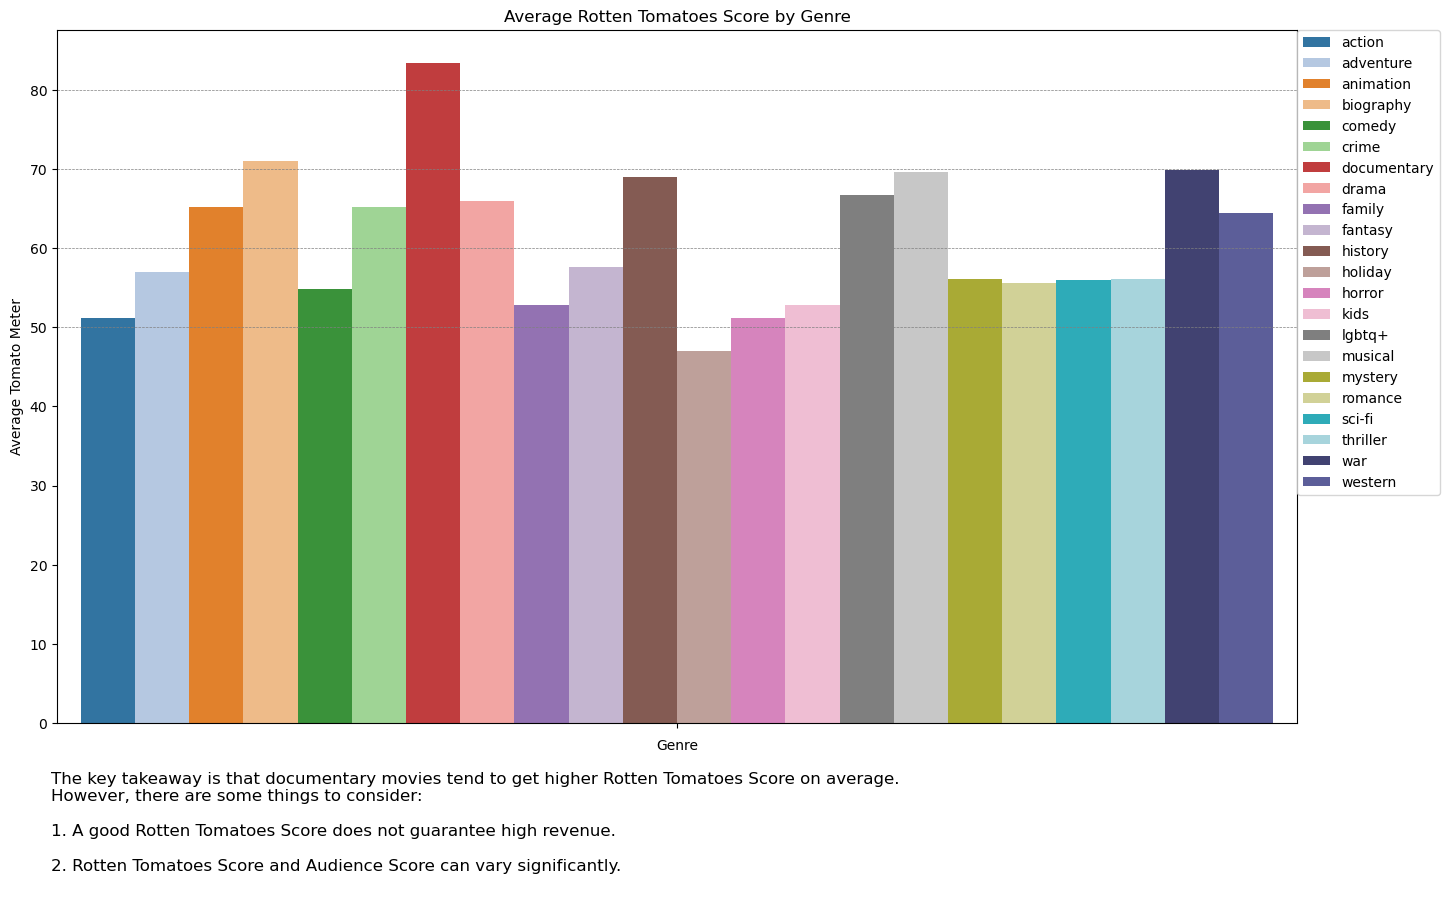

In [1417]:
# Filter the melted DataFrame to include only rows where the genre is present (is_genre == 1)
movies_filtered_genre = movies_melted_genre[movies_melted_genre["is_genre"] == 1]

# Calculate mean Rotten Tomatoes Score earnings by genre
mean_tomatoMeter_by_genre = movies_filtered_genre.groupby("genre")["tomatoMeter"].mean().reset_index()

# Create the bar plot
colors = sns.color_palette("tab20") + sns.color_palette("tab20b") # Variable that stores 40 different colours. Reusable
fig = plt.figure(figsize=(16, 9))
ax = sns.barplot(hue="genre", y="tomatoMeter", data=mean_tomatoMeter_by_genre, palette=colors)
plt.title("Average Rotten Tomatoes Score by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Tomato Meter")

# Adjust the spacing between the y axis and the first bar
ax.margins(x=0.02)

# Make the legend appear outside the plot
ax.legend(bbox_to_anchor=(1.0, 1), loc='upper left', borderaxespad=0)

# Add horizontal lines at specific y-values
for y in [50, 60, 70, 80]:
    ax.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Supporting text to better understand the barplot
plt.text(-0.42, -23, 
         "The key takeaway is that documentary movies tend to get higher Rotten Tomatoes Score on average.\n"
         "However, there are some things to consider:\n"
         "\n"
         "1. A good Rotten Tomatoes Score does not guarantee high revenue.\n"
         "\n"
         "2. Rotten Tomatoes Score and Audience Score can vary significantly.\n"
         "\n",
         fontsize=12)
plt.show()

In [1419]:
fig.savefig('tomatoMeterScoreByGenre.pdf', format='pdf', bbox_inches="tight")

### Objective 4: Can romance movies perform well if it is not released around the Valentine month(February)?

This time we'll be using Audience Score instead of Rotten Tomatoes Score

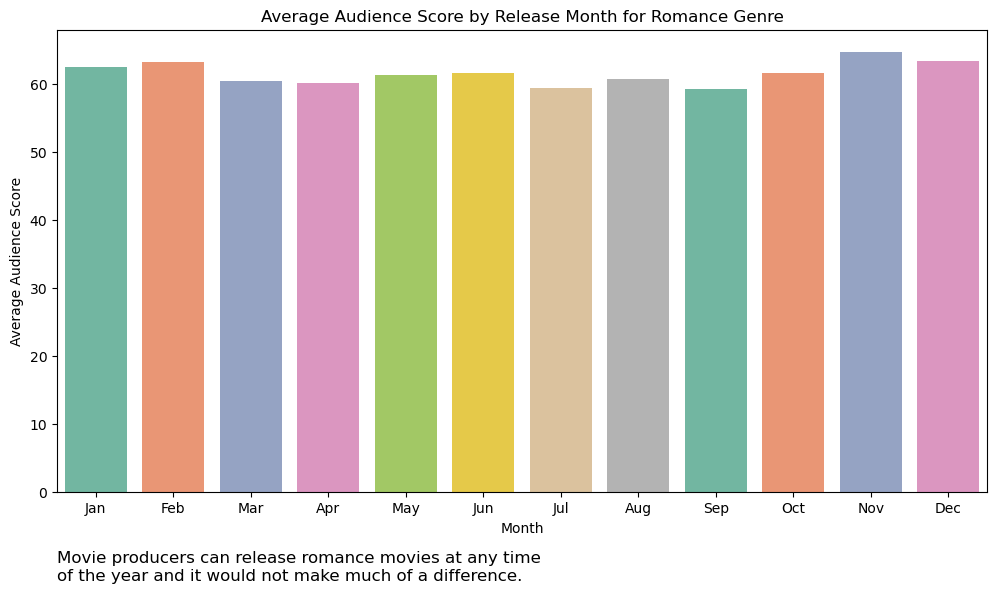

In [1423]:
# Further filter to include only "Romance" genre
romance_movies = movies_filtered_genre.loc[movies_filtered_genre["genre"] == "romance"]

# Group the release date by month
romance_movies = romance_movies.assign(month=romance_movies["releaseDateTheaters"].dt.month)

# Calculate mean Audience Score by month
mean_audience_score_by_month = romance_movies.groupby("month")["audienceScore"].mean().reset_index()

# Create the bar plot
fig = plt.figure(figsize=(12, 6))
ax = sns.barplot(x="month", hue="month", y="audienceScore", data=mean_audience_score_by_month, legend=False, palette="Set2")
plt.title("Average Audience Score by Release Month for Romance Genre")
plt.xlabel("Month")
plt.ylabel("Average Audience Score")
plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Supporting text to better understand the barplot
plt.text(-0.5, -13, 
         "Movie producers can release romance movies at any time\n"
         "of the year and it would not make much of a difference.",
         fontsize=12)
plt.show()

In [1425]:
fig.savefig('romanceMoviesScoreByMonth.pdf', format='pdf', bbox_inches="tight")

### Objective 5: How much of a difference is there between the Rotten Tomatoes Score and the Audience Score?

<Figure size 1600x800 with 0 Axes>

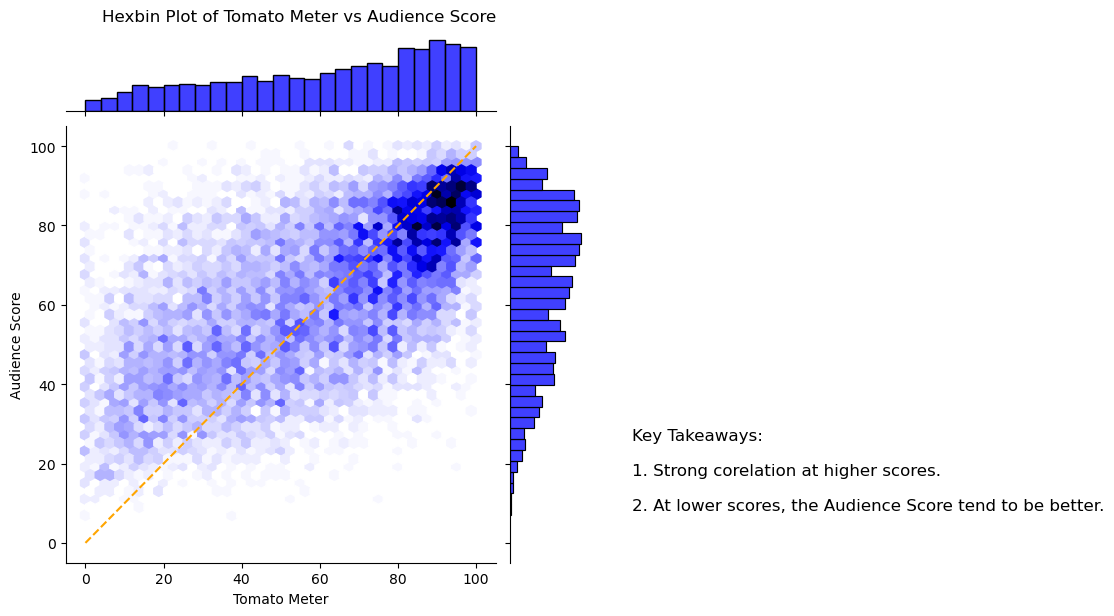

In [1427]:
#Hexbinplot
fig = plt.figure(figsize=(16, 8))
ax = sns.jointplot(x="tomatoMeter", y="audienceScore", data=movies_data_no_null, kind="hex", color="blue", gridsize=40)
plt.suptitle('Hexbin Plot of Tomato Meter vs Audience Score', y=1.02)
plt.xlabel("Tomato Meter")
plt.ylabel("Audience Score")

# Add diagonal line for reference
ax.ax_joint.plot([0, 100], [0, 100], color='orange', linestyle='--')

# Supporting text to better understand the pie chart
plt.text(140, -0.5, 
         "Key Takeaways:\n"
         "\n"
         "1. Strong corelation at higher scores.\n"
         "\n"
         "2. At lower scores, the Audience Score tend to be better.\n"
         "\n",
         fontsize=12)

plt.show()

In [1429]:
ax.fig.savefig('tomatoMeterVsAudienceScore_Hexblin.pdf', format='pdf', bbox_inches="tight")